In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('traffic.csv')

In [6]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [8]:
pageviews = df[df['event'] == 'pageview']
total_pageviews = pageviews.shape[0]
average_daily_pageviews = total_pageviews / 7  # Assuming a 7-day period

print(f"Total Pageviews: {total_pageviews}")
print(f"Average Daily Pageviews: {average_daily_pageviews:.2f}")


Total Pageviews: 142015
Average Daily Pageviews: 20287.86


In [9]:
daily_pageviews = pageviews.groupby('date').size()
print("\nDaily Pageviews:")
print(daily_pageviews)


Daily Pageviews:
date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
dtype: int64


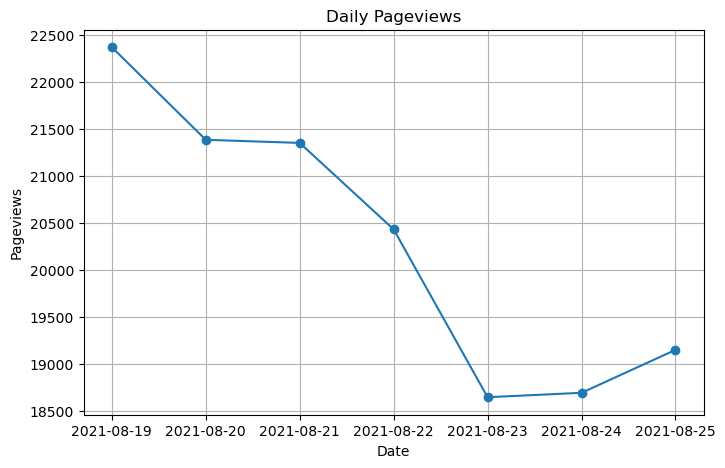

In [10]:
daily_pageviews.plot(kind='line', marker='o', figsize=(8, 5), title='Daily Pageviews')
plt.xlabel('Date')
plt.ylabel('Pageviews')
plt.grid()
plt.show()


In [11]:
event_counts = df['event'].value_counts()
print("\nEvent Counts:")
print(event_counts)



Event Counts:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


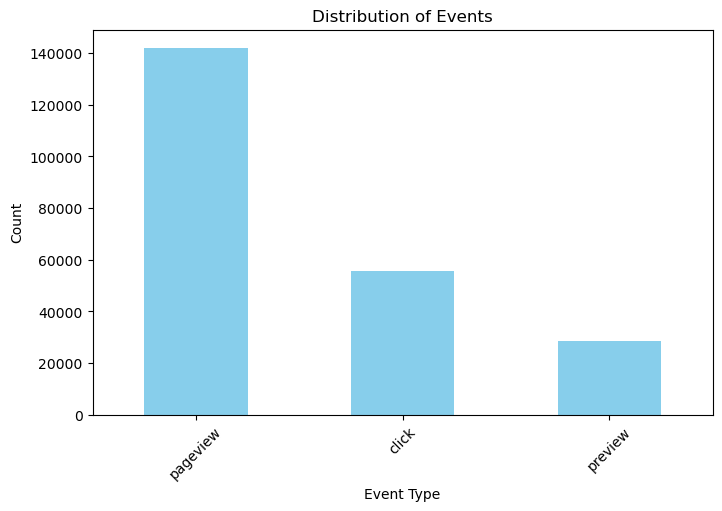

In [12]:
event_counts.plot(kind='bar', figsize=(8, 5), title='Distribution of Events', color='skyblue')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [13]:
pageviews_by_country = pageviews.groupby('country').size().sort_values(ascending=False)
print("\nPageviews by Country:")
print(pageviews_by_country)


Pageviews by Country:
country
Saudi Arabia                28873
India                       27286
United States               20839
France                       9674
Iraq                         4897
                            ...  
Central African Republic        1
Wallis and Futuna               1
Principality of Monaco          1
Saint Martin                    1
Solomon Islands                 1
Length: 211, dtype: int64


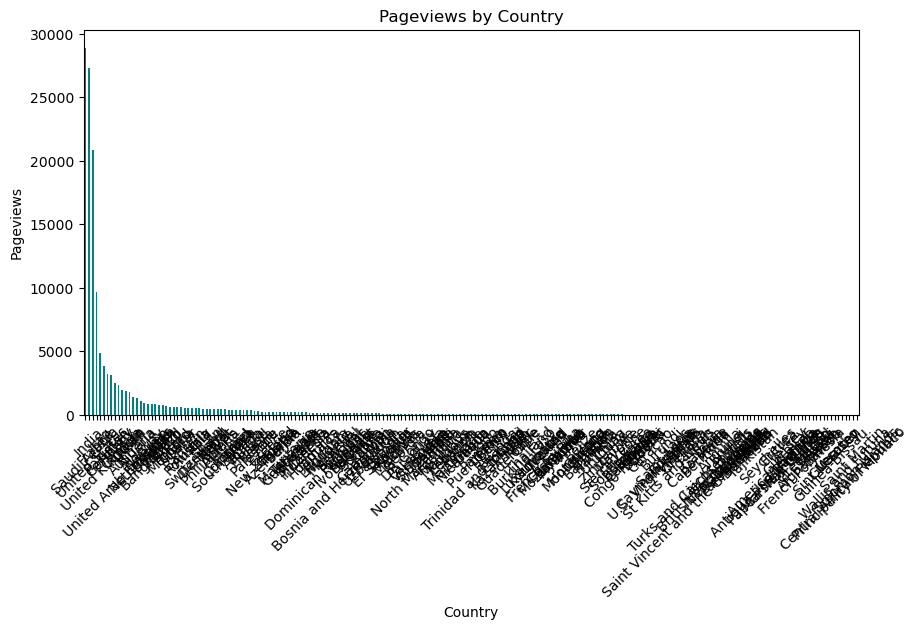

In [14]:
pageviews_by_country.plot(kind='bar', figsize=(10, 5), title='Pageviews by Country', color='teal')
plt.xlabel('Country')
plt.ylabel('Pageviews')
plt.xticks(rotation=45)
plt.show()

In [15]:
clicks = df[df['event'] == 'click']
total_clicks = clicks.shape[0]
ctr = (total_clicks / total_pageviews) * 100 if total_pageviews > 0 else 0

In [16]:
print(f"\nOverall CTR: {ctr:.2f}%")


Overall CTR: 39.24%


In [17]:
ctr_by_link = (
    clicks.groupby('linkid').size() / pageviews.groupby('linkid').size()
) * 100
ctr_by_link = ctr_by_link.dropna().sort_values()

print("\nCTR by Link:")
print(ctr_by_link)



CTR by Link:
linkid
899f223b-55f0-5f5a-8351-3ea64d0ce29f       9.090909
6dacffe9-779d-4e9b-94dd-a3e811b2983e       9.090909
6e6c1939-9d37-450e-aec1-2af09140bc33       9.090909
229f278b-f052-57e7-813d-15d25f226723       9.090909
5a5e88cd-fae9-4383-8b78-bf7f4e4f5fbd      12.500000
                                           ...     
5e6c612c-0672-4b78-8a3a-11c1e2dcaf43     200.000000
1e4610cb-0303-5316-a75d-a867ed5044b5     200.000000
330773a6-f22a-5c7a-a3e4-7809fe8539b9     300.000000
27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7     300.000000
c95f1fc1-fab0-4c74-b3f5-52bd3684a713    9230.000000
Length: 2253, dtype: float64


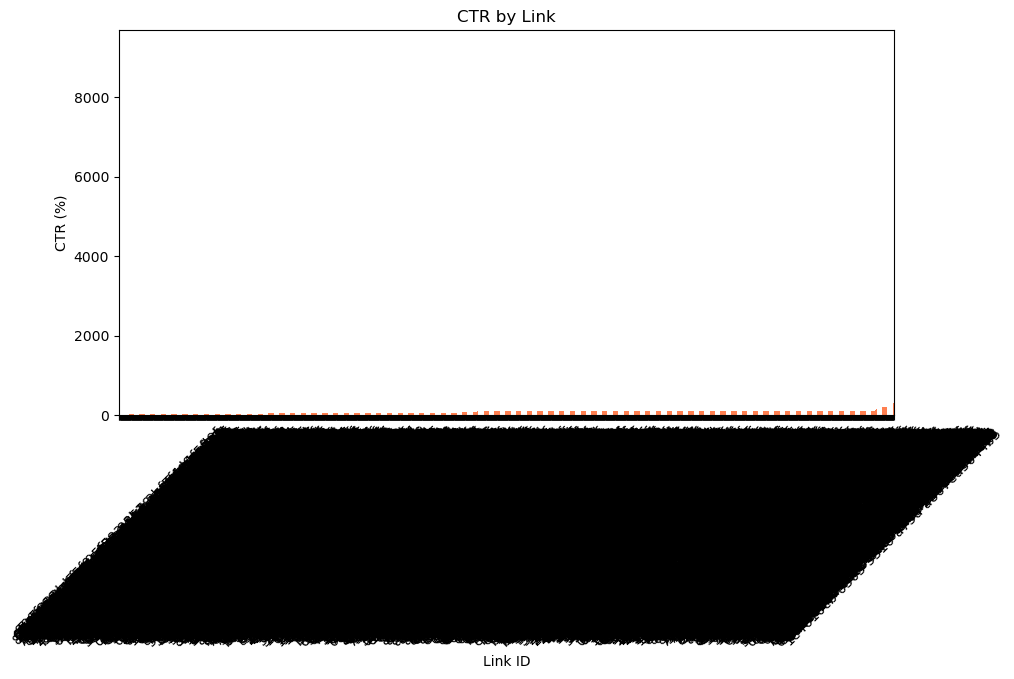

In [18]:
ctr_by_link.plot(kind='bar', figsize=(10, 5), title='CTR by Link', color='coral')
plt.xlabel('Link ID')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.show()


In [19]:
clicks_by_link = clicks.groupby('linkid').size()
pageviews_by_link = pageviews.groupby('linkid').size()
correlation = clicks_by_link.corr(pageviews_by_link)

In [20]:
print(f"\nCorrelation between Clicks and Pageviews by Link: {correlation:.2f}")



Correlation between Clicks and Pageviews by Link: 0.99


In [22]:
all_links = pageviews['linkid'].unique()
pageviews_by_link = pageviews.groupby('linkid').size().reindex(all_links, fill_value=0)
clicks_by_link = clicks.groupby('linkid').size().reindex(all_links, fill_value=0)

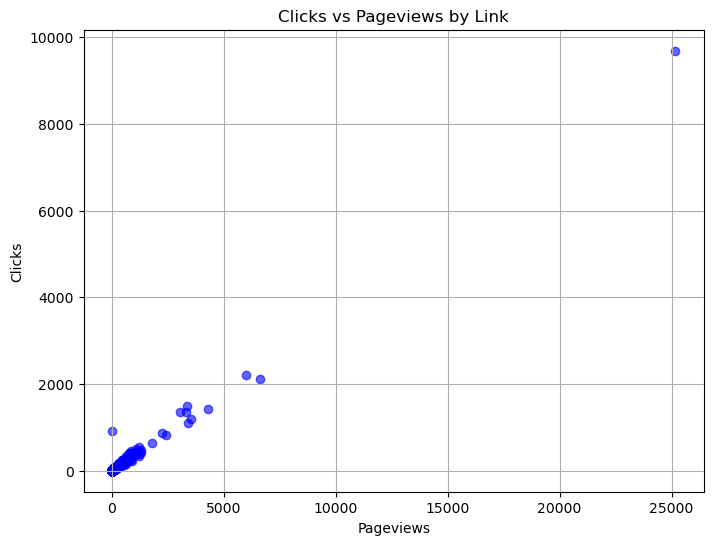

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(pageviews_by_link, clicks_by_link, alpha=0.6, color='blue')
plt.title("Clicks vs Pageviews by Link")
plt.xlabel("Pageviews")
plt.ylabel("Clicks")
plt.grid()
plt.show()